# Using FISSA with Suite2p

[suite2p](https://github.com/MouseLand/suite2p) is a blind source separation toolbox for cell detection and signal extraction. 

Here we illustrate how to use suite2p to detect cell locations, and then use FISSA to remove neuropil signals from the ROI signals.

The suite2p parts of this tutorial are based on their [Jupyter notebook example](https://github.com/MouseLand/suite2p/blob/master/jupyter/run_pipeline_tiffs_or_batch.ipynb).

Note that the below results are not representative of either suite2p or FISSA performance, as we are using a very small example dataset.

**Reference:**
Pachitariu, M., Stringer, C., Dipoppa, M., Schröder, S., Rossi, L. F., Dalgleish, H., Carandini, M. & Harris, K. D. (2017). Suite2p: beyond 10,000 neurons with standard two-photon microscopy. bioRxiv:&nbsp;[061507](https://www.biorxiv.org/content/10.1101/061507v2); doi:&nbsp;[10.1101/061507](https://doi.org/10.1101/061507).

## Imports

In [1]:
# FISSA toolbox
import fissa

# suite2p toolbox
import suite2p.run_s2p

# numpy toolbox
import numpy as np

# Plotting toolbox, with notebook embedding options
import holoviews as hv
%load_ext holoviews.ipython
%output widgets='embed'

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W

## Run suite2p

In [2]:
# Set your options for running
ops = suite2p.run_s2p.default_ops()  # populates ops with the default options

# Provide an h5 path in 'h5py' or a tiff path in 'data_path'
# db overwrites any ops (allows for experiment specific settings)
db = {
    'h5py': [],  # a single h5 file path
    'h5py_key': 'data',
    'look_one_level_down': False,  # whether to look in ALL subfolders when searching for tiffs
    'data_path': ['exampleData/20150529'],  # a list of folders with tiffs 
                                            # (or folder of folders with tiffs if look_one_level_down is True,
                                            # or subfolders is not empty)
    'save_path0': './',  # save path                                      
    'subfolders': [],  # choose subfolders of 'data_path' to look in (optional)
    'fast_disk': './',  # string which specifies where the binary file will be stored (should be an SSD)
    'reg_tif': True,  # save the motion corrected tiffs
    'tau': 0.7,  # timescale of gcamp6f
    'fs': 1,  # sampling rate
    'spatial_scale': 4
}

# Run one experiment
opsEnd = suite2p.run_s2p.run_s2p(ops=ops, db=db)

{'h5py': [], 'h5py_key': 'data', 'look_one_level_down': False, 'data_path': ['exampleData/20150529'], 'save_path0': './', 'subfolders': [], 'fast_disk': './', 'reg_tif': True, 'tau': 0.7, 'fs': 1, 'spatial_scale': 4}
tif
** Found 3 tifs - converting to binary **
time 1.05 sec. Wrote tifs to binaries for 1 planes
>>>>>>>>>>>>>>>>>>>>> PLANE 0 <<<<<<<<<<<<<<<<<<<<<<
----------- REGISTRATION
registering 864 frames
Reference frame, 4.50 sec.
864/864 frames, 8.28 sec.
bad frames file path: /home/scott/Documents/git/scottclowe/fissa/examples/exampleData/20150529/bad_frames.npy
----------- Total 12.88 sec
----------- ROI DETECTION AND EXTRACTION
Binning movie in chunks of length 01
Binned movie [864,173,152], 0.33 sec.
NOTE: FORCED spatial scale ~48 pixels, time epochs 1.00, threshold 20.00 
0 ROIs, score=327.89
Found 29 ROIs, 4.92 sec
NOTE: applying classifier /home/scott/venvs/fissa_conda/lib/python3.6/site-packages/suite2p/extraction/../classifiers/classifier_user.npy
After removing overla

## Load the relevant data from the analysis

In [3]:
# Extract the motion corrected tiffs (make sure that the reg_tif option is set to true, see above)
images = './suite2p/plane0/reg_tif'

# Load the detected regions of interest
stat = np.load('./suite2p/plane0/stat.npy', allow_pickle=True)  # cell stats
ops = np.load('./suite2p/plane0/ops.npy', allow_pickle=True).item()
iscell = np.load('./suite2p/plane0/iscell.npy', allow_pickle=True)[:, 0]

# Get image size
Lx = ops['Lx']
Ly = ops['Ly']

# Get the cell ids
ncells = len(stat)
cell_ids = np.arange(ncells)  # assign each cell an ID, starting from 0.
cell_ids = cell_ids[iscell==1]  # only take the ROIs that are actually cells.
num_rois = len(cell_ids)

# Generate ROI masks in a format usable by FISSA (in this case, a list of masks)
rois = [np.zeros((Ly, Lx), dtype=bool) for n in range(num_rois)]

for i, n in enumerate(cell_ids):
    # i is the position in cell_ids, and n is the actual cell number
    ypix = stat[n]['ypix'][~stat[n]['overlap']]
    xpix = stat[n]['xpix'][~stat[n]['overlap']]
    rois[i][ypix, xpix] = 1

## Run FISSA with the defined ROIs and data

In [4]:
output_folder = 'fissa_suite2p_example'
exp = fissa.Experiment(images, [rois[:ncells]], output_folder)
exp.separate()

Doing region growing and data extraction....
Doing signal separation....
NMF converged after 1158 iterations.
Finished ROI number 4
NMF converged after 1161 iterations.
Finished ROI number 5
NMF converged after 1166 iterations.
Finished ROI number 2
NMF converged after 996 iterations.
Finished ROI number 0
NMF converged after 1103 iterations.
Finished ROI number 1
NMF converged after 1052 iterations.
NMF converged after 1115 iterations.
NMF converged after 1107 iterations.
Finished ROI number 6
Finished ROI number 7
Finished ROI number 3
NMF converged after 1186 iterations.
Finished ROI number 8
NMF converged after 1155 iterations.
Finished ROI number 9
NMF converged after 1201 iterations.
Finished ROI number 10
NMF converged after 1206 iterations.
Finished ROI number 12
NMF converged after 1137 iterations.
Finished ROI number 13
NMF converged after 1200 iterations.
Finished ROI number 11


## Plot the resulting ROI signals

:Layout
   .HoloMap.I  :HoloMap   [Cell]
      :Overlay
         .Raster.I   :Raster   [x,y]   (z)
         .Curve.I    :Curve   [x]   (y)
         .Curve.II   :Curve   [x]   (y)
         .Curve.III  :Curve   [x]   (y)
         .Curve.IV   :Curve   [x]   (y)
         .Curve.V    :Curve   [x]   (y)
         .Curve.VI   :Curve   [x]   (y)
         .Curve.VII  :Curve   [x]   (y)
         .Curve.VIII :Curve   [x]   (y)
         .Curve.IX   :Curve   [x]   (y)
         .Curve.X    :Curve   [x]   (y)
         .Curve.XI   :Curve   [x]   (y)
         .Curve.XII  :Curve   [x]   (y)
         .Curve.XIII :Curve   [x]   (y)
         .Curve.XIV  :Curve   [x]   (y)
         .Curve.XV   :Curve   [x]   (y)
         .Curve.XVI  :Curve   [x]   (y)
   .HoloMap.II :HoloMap   [Cell]
      :Overlay
         .Curve.Suite2p :Curve   [x]   (y)
         .Curve.FISSA   :Curve   [x]   (y)
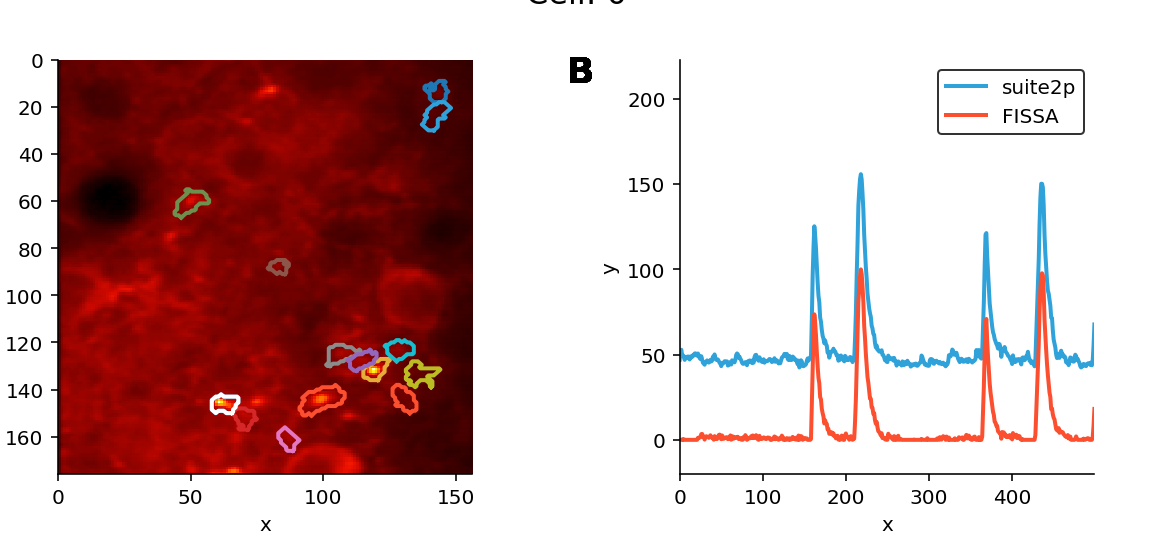
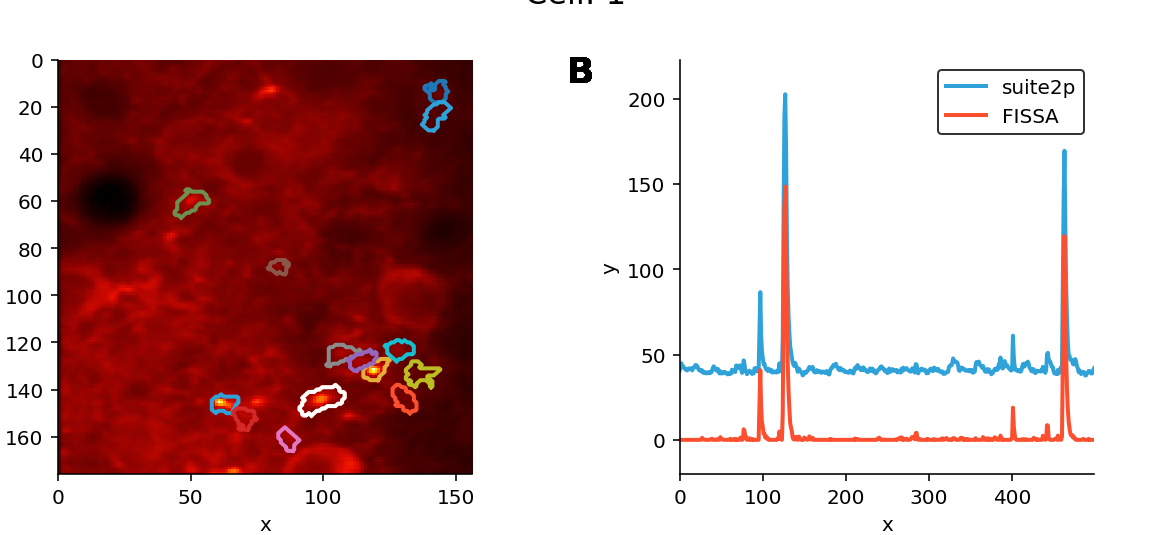
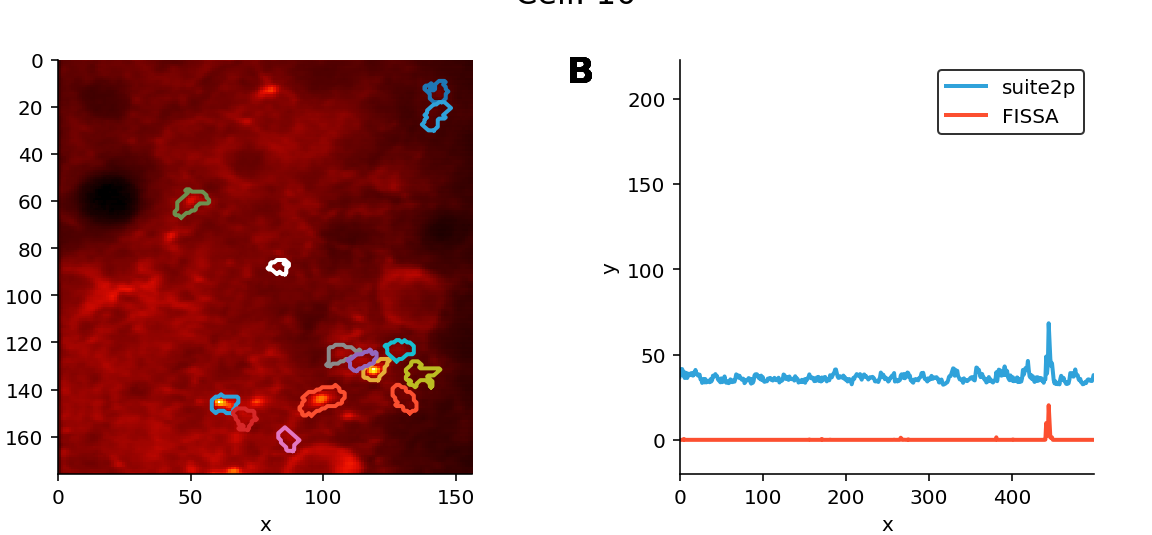
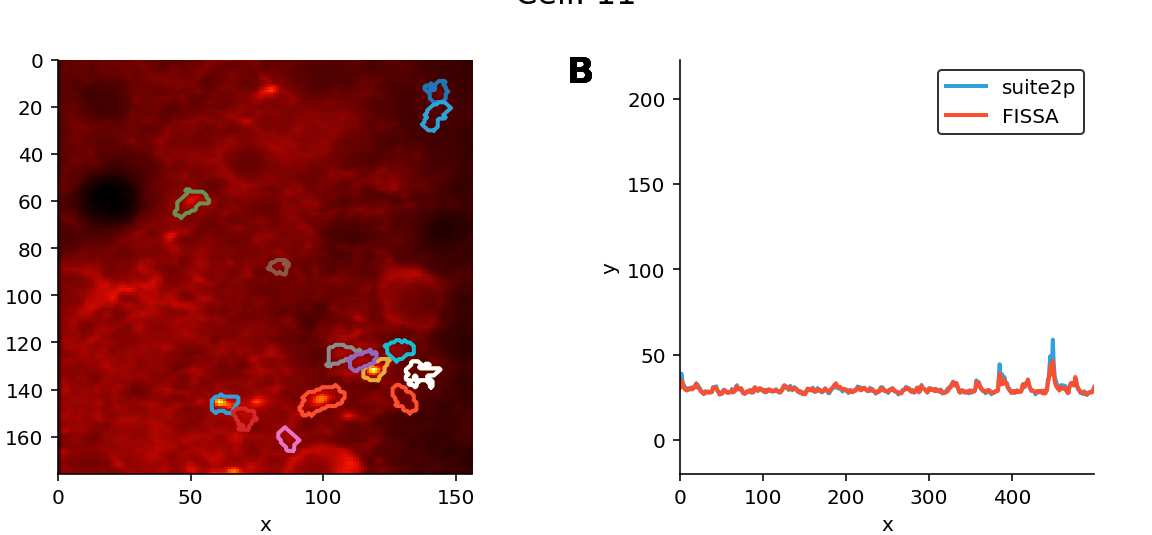
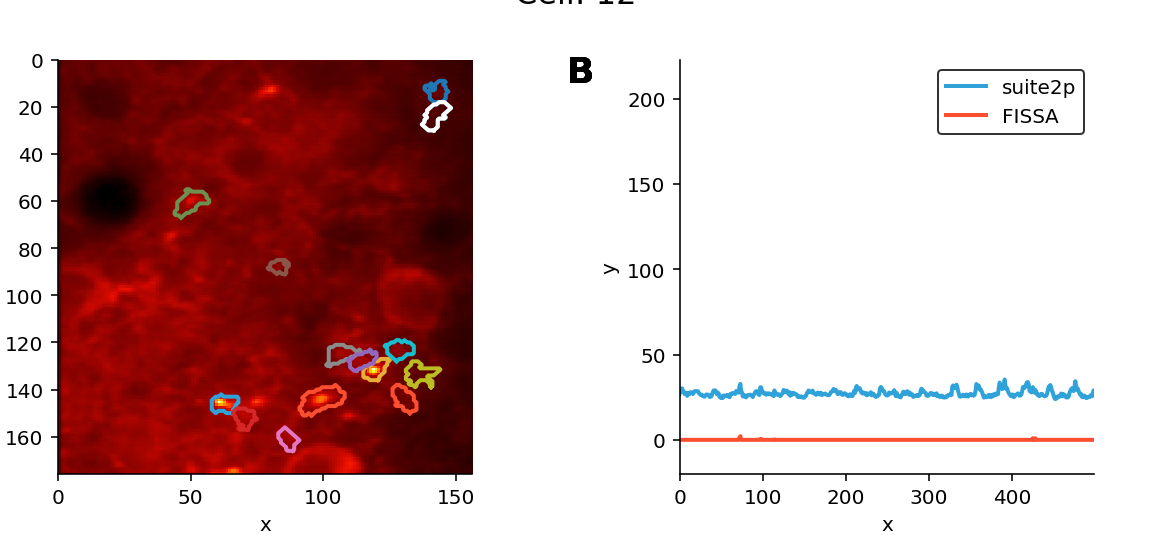
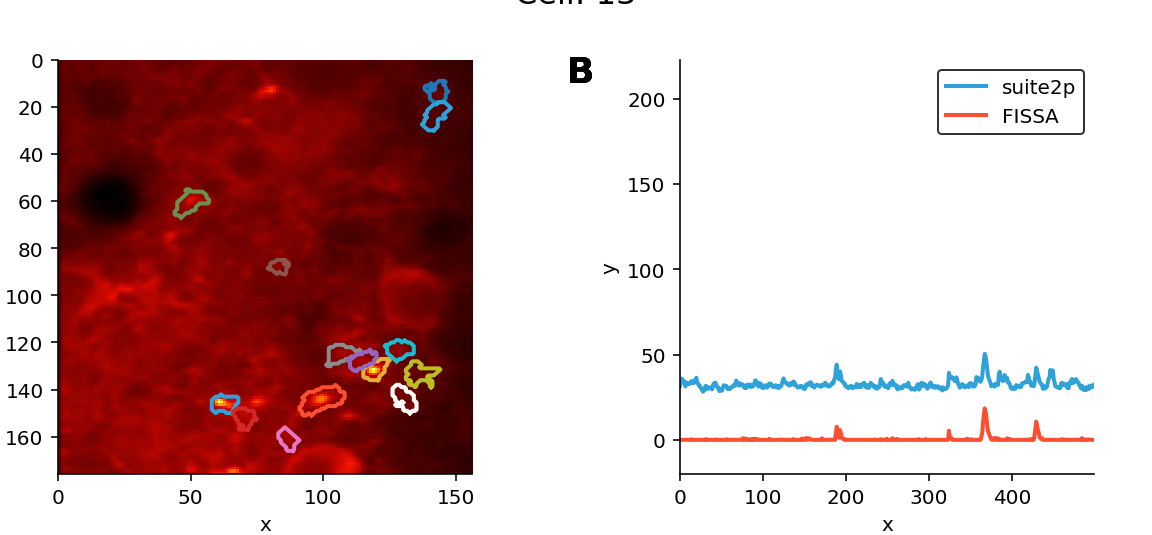
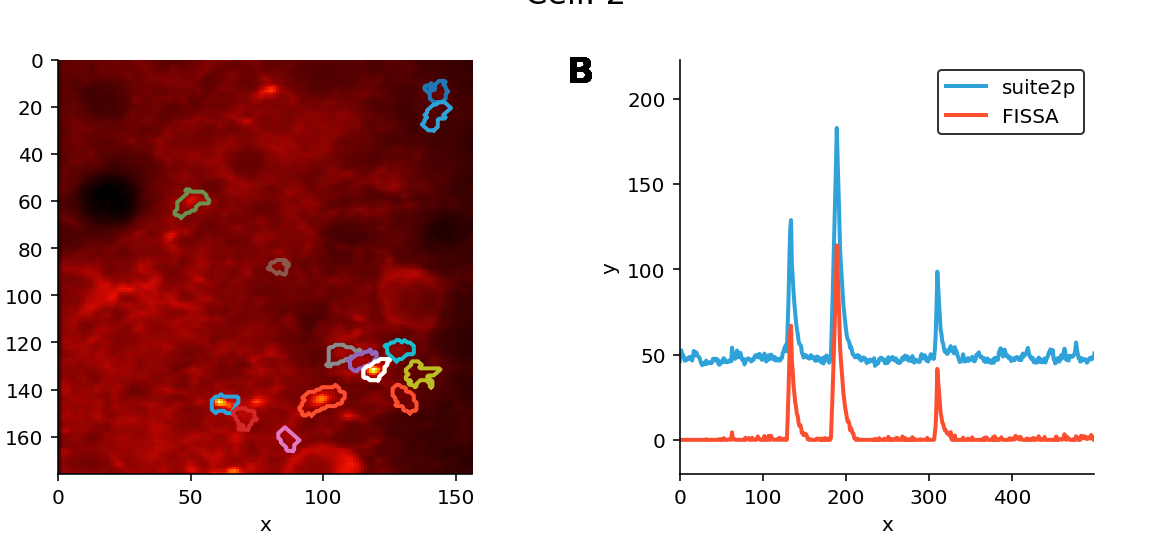
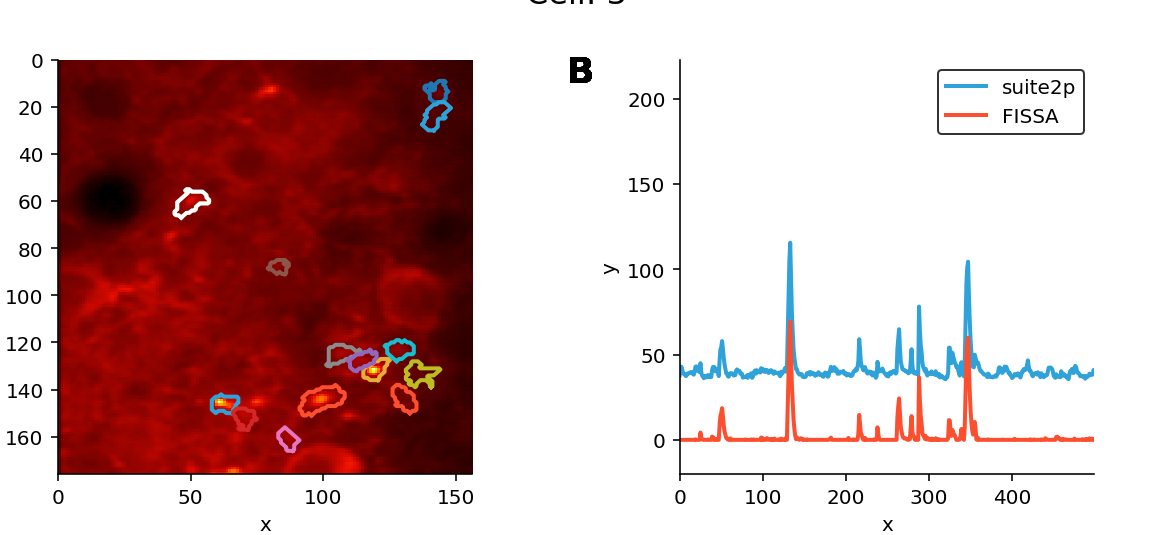
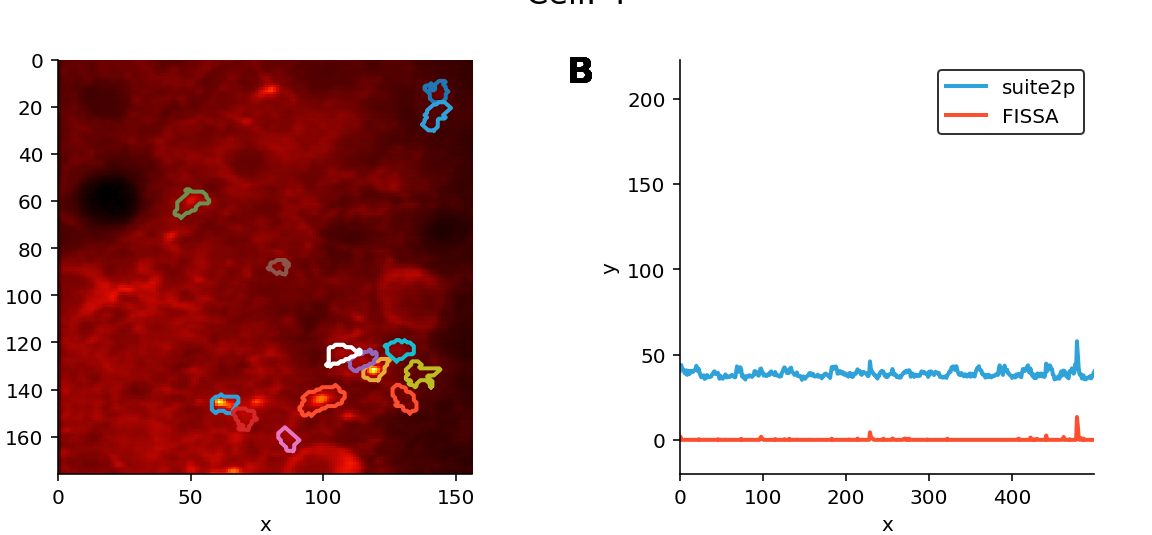
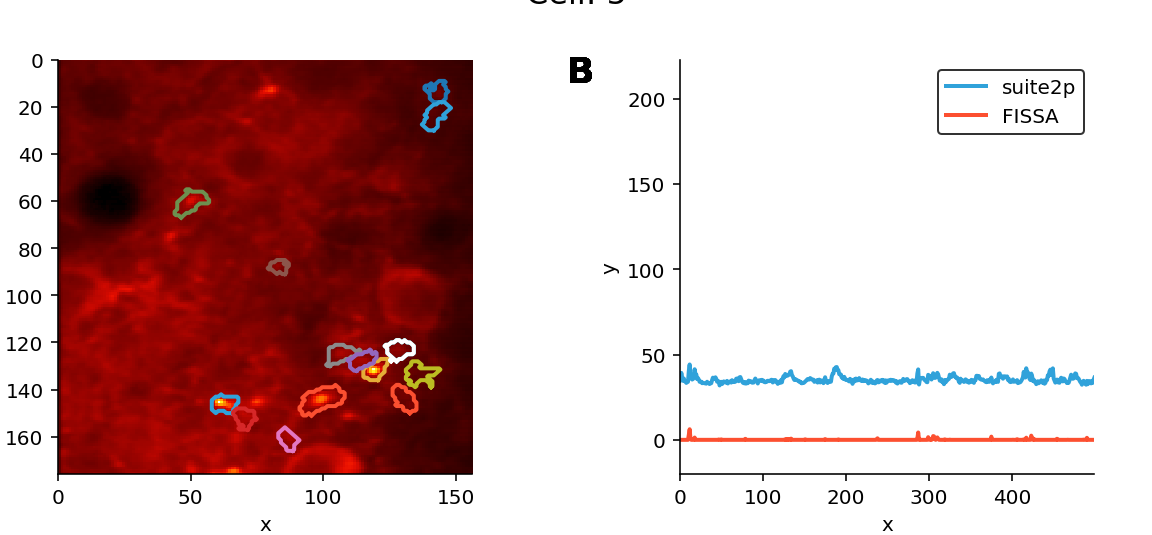
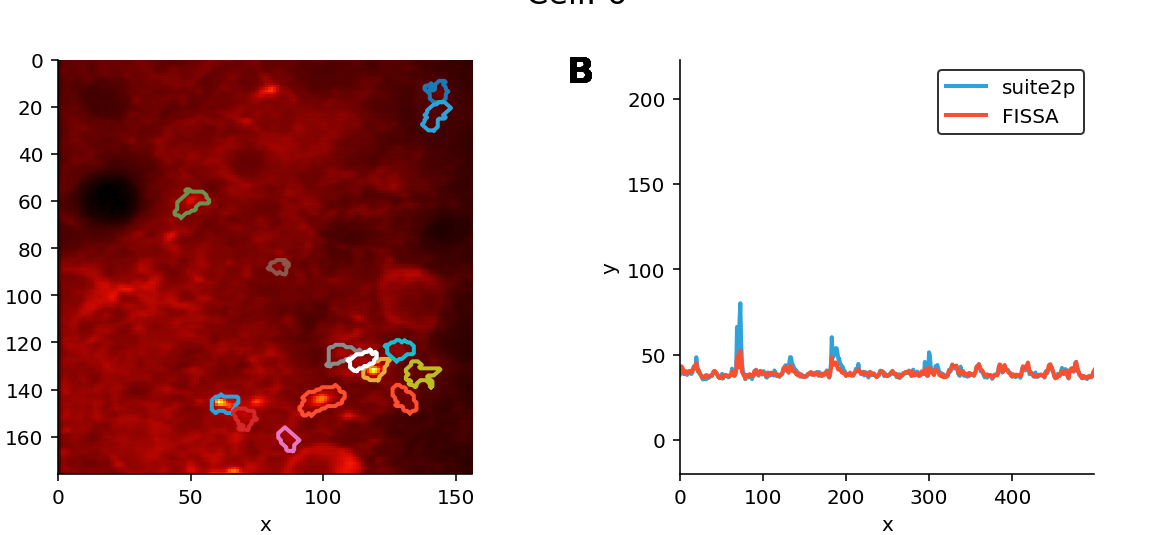
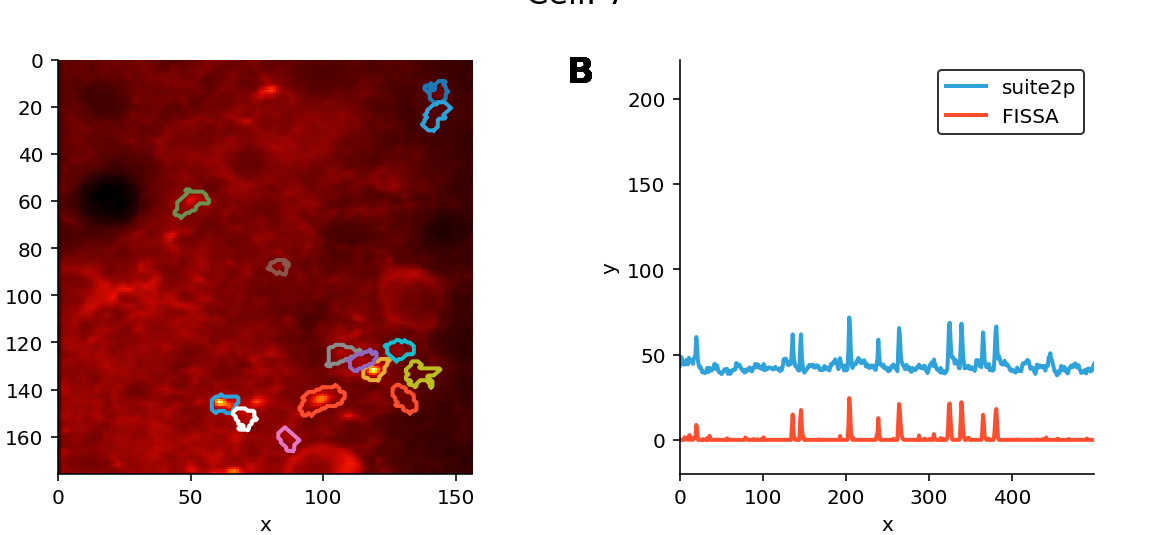
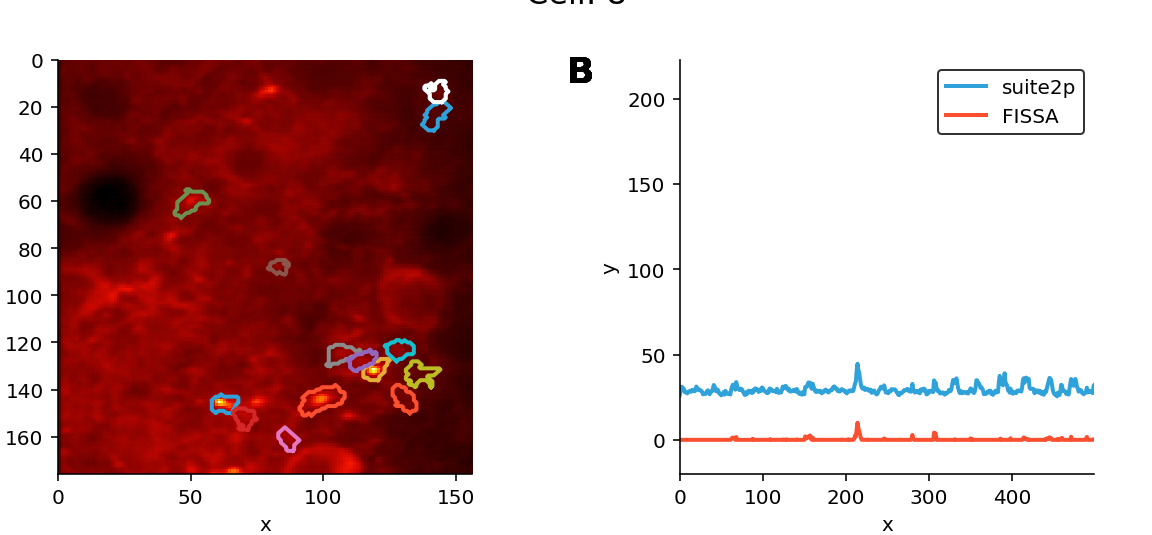
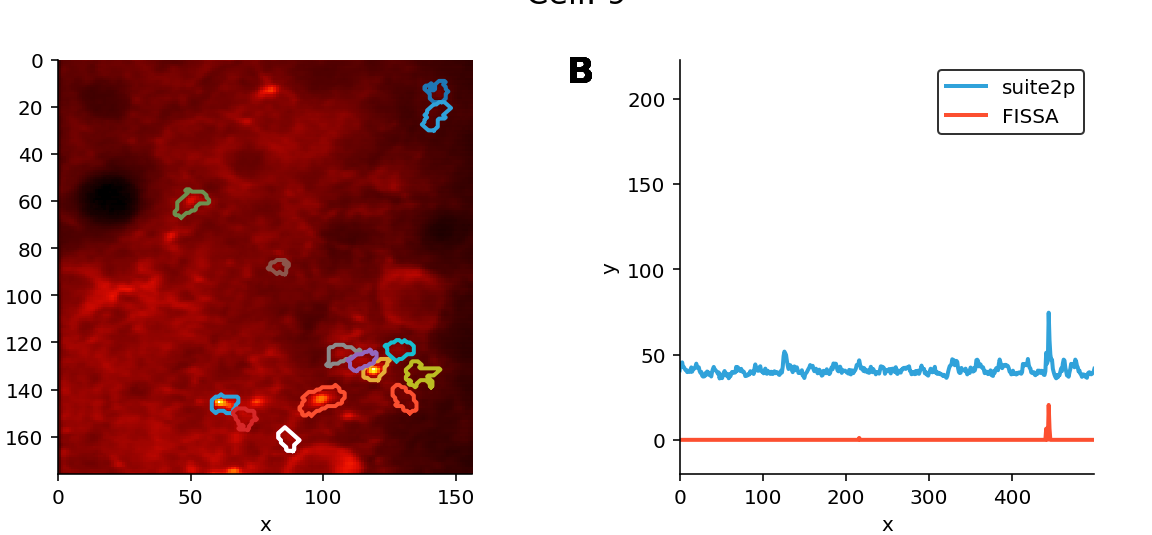
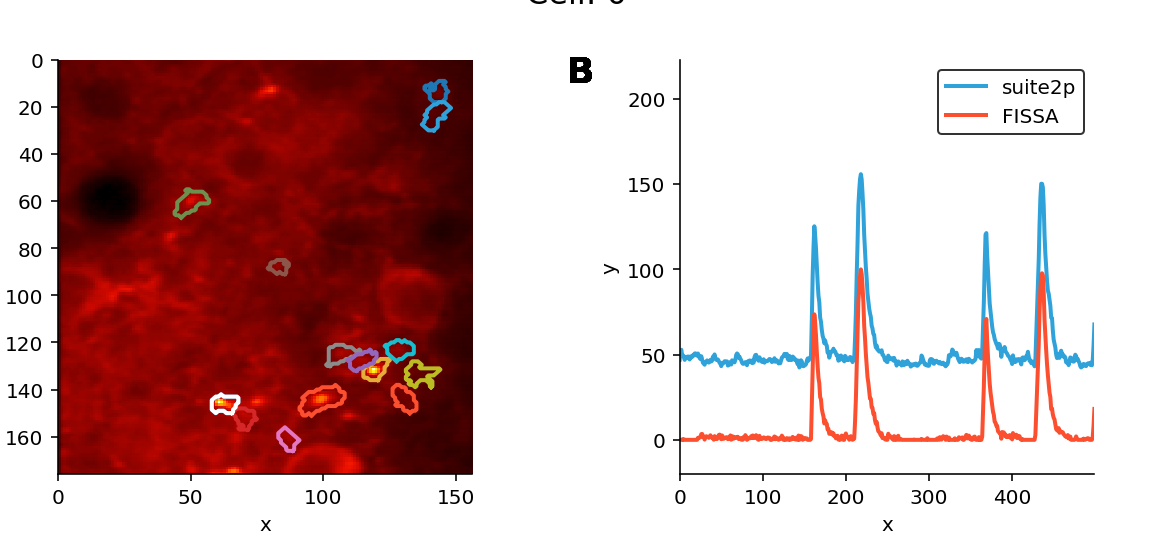

In [5]:
%%opts Curve {+axiswise}


def plot_cell_regions(roi_polys, plot_neuropil=False):
    '''
    Plot a single cell region, using holoviews.
    '''
    out = hv.Overlay()

    if plot_neuropil:
        # Plot the neuropil as well as the ROI
        n_region = len(roi_polys)
    else:
        # Just plot the ROI, not the neuropil
        n_region = 1

    for i_region in range(n_region):
        for part in roi_polys[i_region]:
            x = part[:, 1]
            y = part[:, 0]
            out *= hv.Curve(zip(x, y)).opts(color='w')

    return out


i_trial = 0

# Generate plots for all detected regions
region_plots = {
    i_cell: plot_cell_regions(exp.roi_polys[i_cell][i_trial])
    for i_cell in range(exp.nCell)
}

# Generate plots for raw extracts and neuropil removed
traces_plots = {
    i_cell: hv.Curve(exp.raw[i_cell][i_trial][0, :], label='suite2p') *
            hv.Curve(exp.result[i_cell][i_trial][0, :], label='FISSA')
    for i_cell in range(exp.nCell)
}

# Generate average image
avg_img = hv.Raster(exp.means[i_trial])

# Generate overlay plot showing each cell location
cell_locs = hv.Overlay()
for c in range(exp.nCell):
    roi_poly = exp.roi_polys[c][i_trial][0][0]
    x = roi_poly[:, 1]
    y = roi_poly[:, 0]
    cell_locs *= hv.Curve(zip(x, y))

# Render holoviews
avg_img * cell_locs * hv.HoloMap(region_plots, kdims=['Cell']) + hv.HoloMap(traces_plots, kdims=['Cell'])

Note that with the above settings for suite2p it seems to have detected more small local axon signals, instead of cells. This can possibly be improved with manual curation and suite2p setting changes, but as noted above these results should not be seen as indicative for either suite2p or FISSA due to the small dataset size.

Also note that the above Suite2P traces are done without suite2p's own neuropil removal algorithm.